<a href="https://colab.research.google.com/github/vaishjah3/ML-Algorithms/blob/main/Visualize_the_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets


In [ ]:
X,y=sklearn.datasets.make_moons(200, noise=0.15)

In [ ]:
type(y[0])

numpy.int64

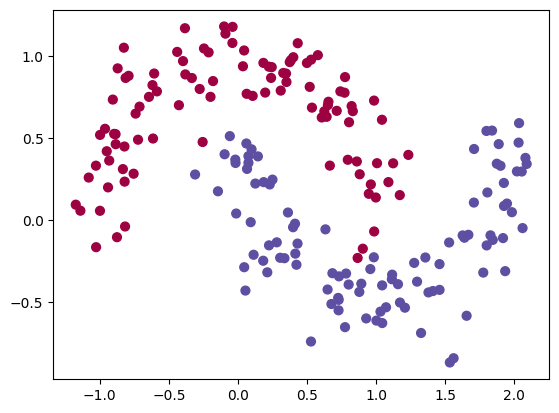

In [ ]:
plt.scatter(X[:,0], X[:,1], s=40,c=y, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
x=torch.FloatTensor(X)
y=torch.LongTensor(y)

  super() gives you access to methods in a superclass from the subclass that inherits from it.
  super() alone returns a temporary object of the superclass that then allows you to call that superclass’s methods.
  first is the subclass, and the second parameter is an object that is an instance of that subclass

torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)[source]
Applies an affine linear transformation to the incoming data:
y
=
x
A
T
+
b
y=xA
T
 +b.

https://realpython.com/python-super/

In [ ]:
class FeedForward(torch.nn.Module):
  def __init__(self, input_neuron, hidden_neurons, output_neurons):
    super().__init__()
    self.hidden=nn.Linear(input_neuron, hidden_neurons)
    self.out=nn.Linear(hidden_neurons, output_neurons)
  def forward(self,x):
    x=self.hidden(x)
    x=F.relu(x)
    x=self.out(x)
    return x

In [ ]:
network=FeedForward(input_neuron=2, hidden_neurons=50, output_neurons=2)
optimizer=torch.optim.SGD(network.parameters(), lr=0.02)
loss_function=torch.nn.CrossEntropyLoss()

In [ ]:
print(y.data.numpy().size)

200


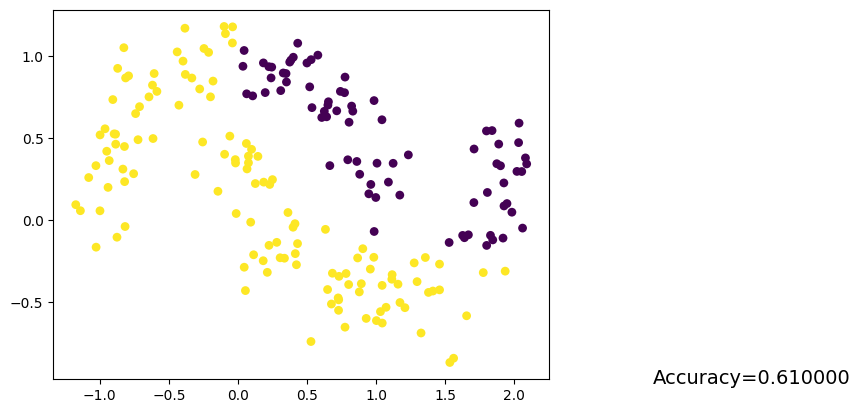

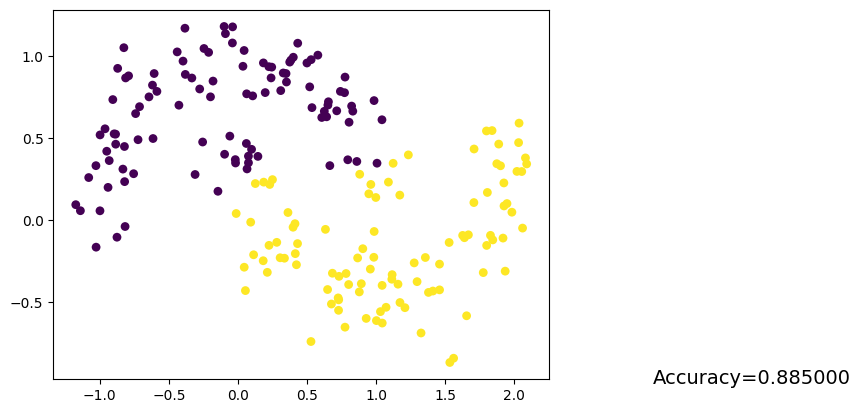

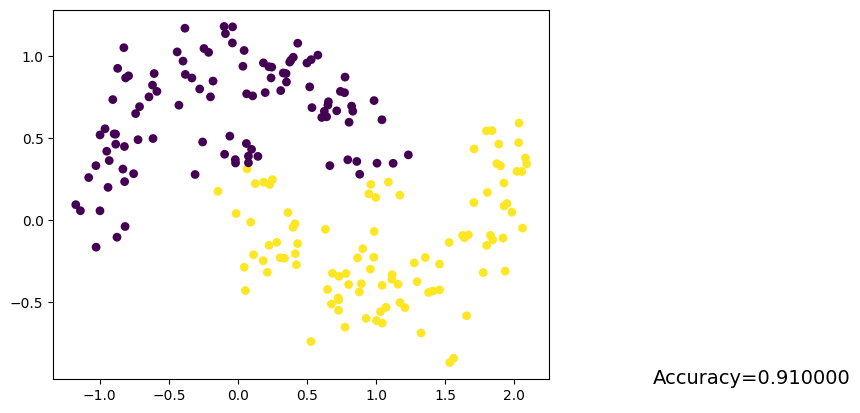

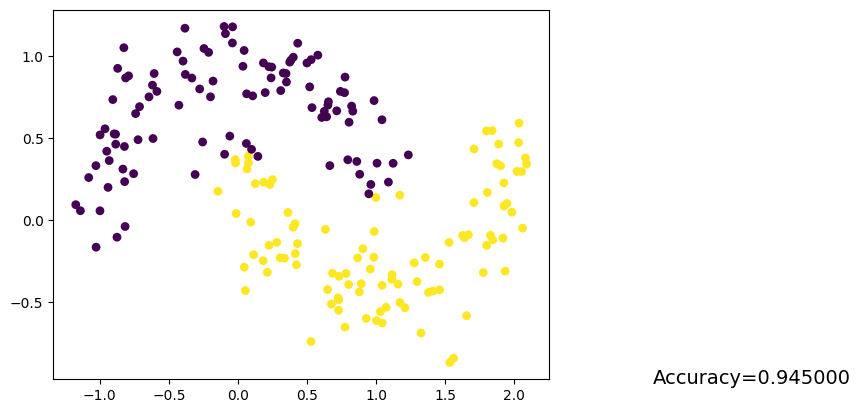

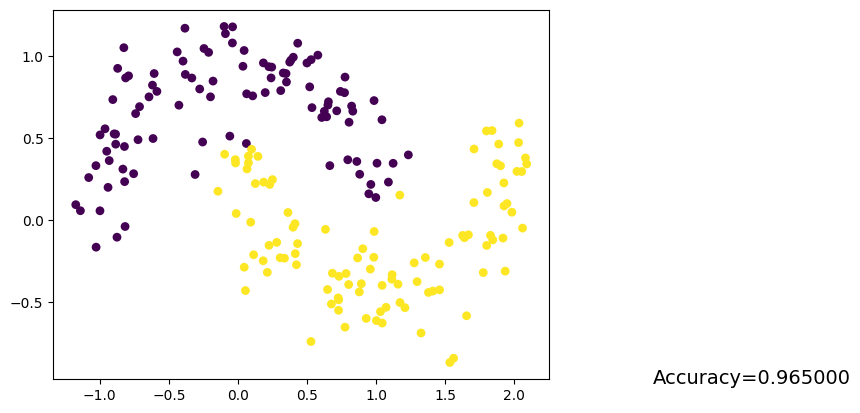

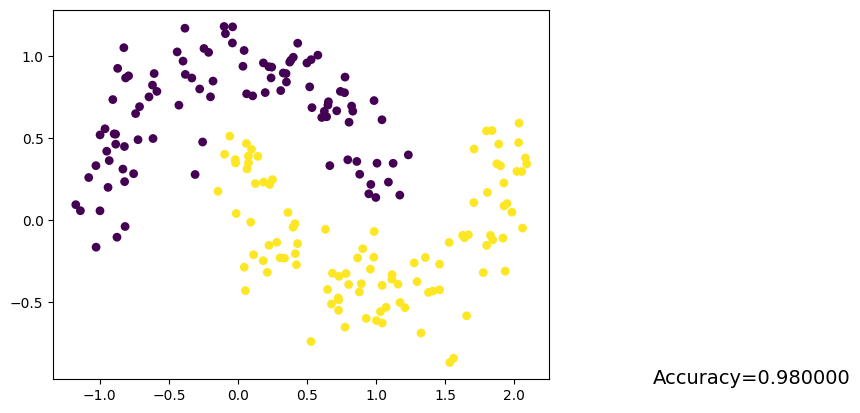

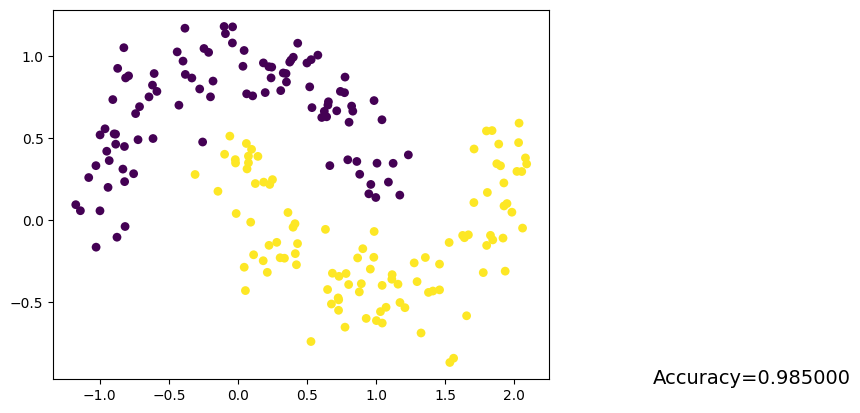

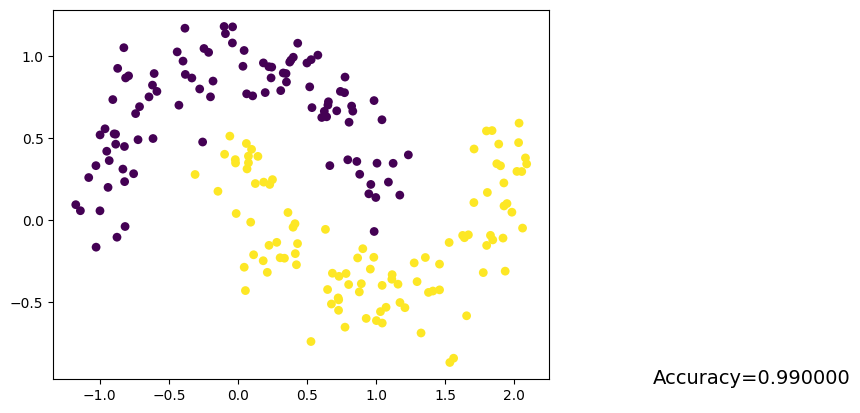

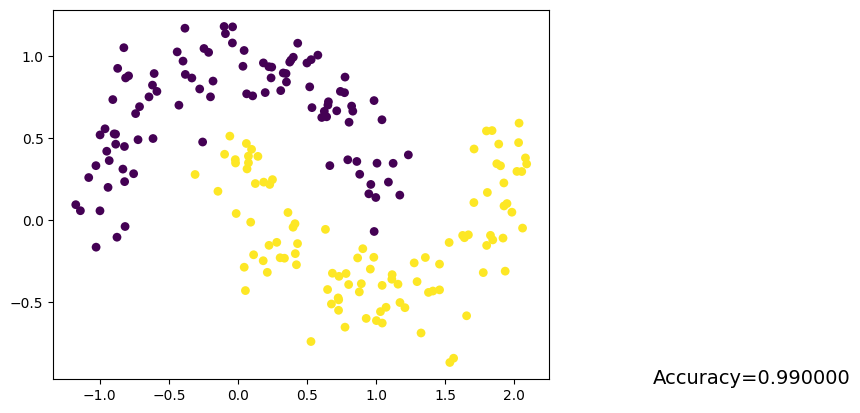

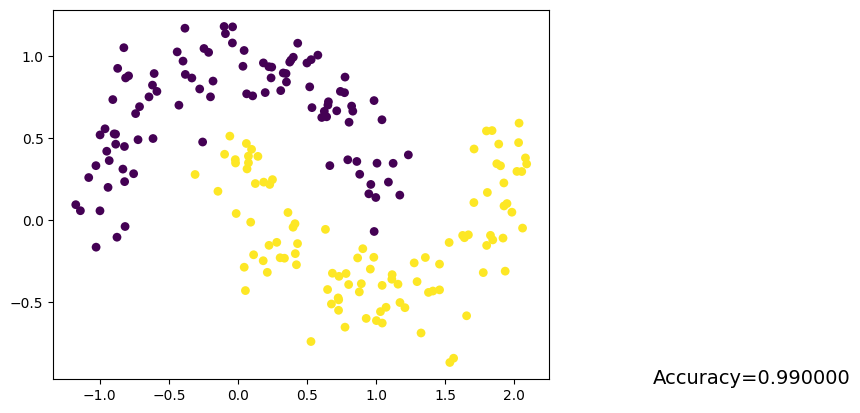

In [ ]:
from functools import total_ordering
plt.ion()
for epoch in range(10000):
  out=network(x)
  loss=loss_function(out, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%1000==0:
    max_value, prediction=torch.max(out,1)
    y_predicted=prediction.data.numpy()
    target_y=y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:,1], c=y_predicted, s=40,linewidths=0)
    accuracy=(y_predicted==target_y).sum()/target_y.size
    plt.text(3, -1, 'Accuracy={:2f}'.format(accuracy), fontdict={'size':14})
    plt.pause(0.1)

plt.ioff()
plt.show()
